## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import os

# Study data files
mouse_path = os.path.join("data", "Mouse_metadata.csv")
study_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_path)
study = pd.read_csv(study_path)
#mouse.head()

# Combine the data into a single dataset
mouse_study = study.merge(mouse, on='Mouse ID')
# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
len(mouse_study['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_study.set_index('Mouse ID')
grouped_study = mouse_study.groupby(['Mouse ID', 'Timepoint']).count()
dup_mice = grouped_study.loc[grouped_study.loc[:,'Metastatic Sites']>1,:]#['Mouse ID', 'Timepoint']]
dup_mice = dup_mice.droplevel('Timepoint')
dup_mice.index.unique()



Index(['g989'], dtype='object', name='Mouse ID')

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study.loc[:,'Mouse ID']=='g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.set_index('Mouse ID')
clean_mouse_study = clean_mouse_study.drop(index='g989')
clean_mouse_study = clean_mouse_study.reset_index()
clean_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_summary = clean_mouse_study.groupby(['Drug Regimen'])
mean_tumor_volume = drug_summary['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_summary['Tumor Volume (mm3)'].median()
var_tumor_volume = drug_summary['Tumor Volume (mm3)'].var()
std_tumor_volume = drug_summary['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_summary['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drug_summary_dict = {'Mean Tumor Volume':mean_tumor_volume,
                    'Median Tumor Volume':median_tumor_volume,
                    'Tumor Volume Variance':var_tumor_volume,
                    'Tumor Volume Std. Dev.':std_tumor_volume,
                    'Tumor Volume Std. Err':sem_tumor_volume}
drug_summary_stats = pd.DataFrame(drug_summary_dict)
drug_summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# agg_mouse_study = mouse_study.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':'mean',
#                                                                    'Tumor Volume (mm3)':'median',
#                                                                    'Tumor Volume (mm3)':'var',
#                                                                    'Tumor Volume (mm3)':'std',
#                                                                    'Tumor Volume (mm3)':'sem'})
agg_mouse_study = clean_mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_mouse_study


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

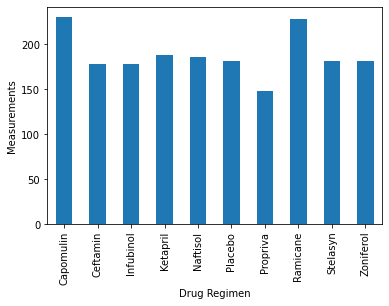

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_data = clean_mouse_study.groupby(['Drug Regimen']).count()
measurements = bar_data.plot.bar(y='Timepoint', use_index=True, legend=False).set_ylabel('Measurements')
measurements

<BarContainer object of 10 artists>

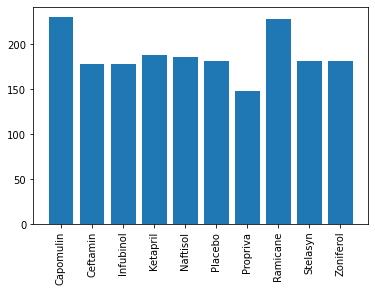

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.xticks(rotation='vertical')
plt.bar(bar_data.index, bar_data['Timepoint'])

<AxesSubplot:ylabel='Mice'>

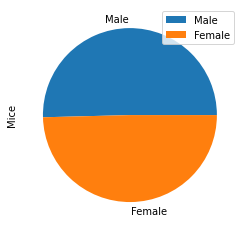

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
males = clean_mouse_study.loc[clean_mouse_study.loc[:,'Sex']=='Male',['Mouse ID','Sex']].groupby('Mouse ID')
females = clean_mouse_study.loc[clean_mouse_study.loc[:,'Sex']=='Female',['Mouse ID','Sex']].groupby('Mouse ID')
num_males = len(males)
num_females = len(females)
sexes = pd.DataFrame({'Mice':[num_males,num_females]},index=['Male','Female'])
sexes.plot.pie(y='Mice')


([<matplotlib.patches.Wedge at 0x292d34dec10>,
 [Text(-1.0999117423341975, -0.013934097579311062, 'Male'),
  Text(1.0999117423341975, 0.013934097579310929, 'Female')])

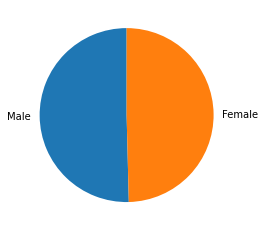

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = [num_males, num_females]
sex_labels = ['Male', 'Female']
plt.pie(sex_count, labels=sex_labels, startangle=90)



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_mouse_study.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(final_timepoint, clean_mouse_study, on=['Mouse ID','Timepoint'])
final_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_vols = final_tumor_vol.loc[final_tumor_vol.loc[:,'Drug Regimen']=='Capomulin','Tumor Volume (mm3)']
ramicane_vols = final_tumor_vol.loc[final_tumor_vol.loc[:,'Drug Regimen']=='Ramicane','Tumor Volume (mm3)']
infubinol_vols = final_tumor_vol.loc[final_tumor_vol.loc[:,'Drug Regimen']=='Infubinol','Tumor Volume (mm3)']
ceftamin_vols = final_tumor_vol.loc[final_tumor_vol.loc[:,'Drug Regimen']=='Ceftamin','Tumor Volume (mm3)']
iqr_capomulin = np.quantile(capomulin_vols, [.25,.75])
iqr_ramicane = np.quantile(ramicane_vols, [.25,.75])
iqr_infubinol = np.quantile(infubinol_vols, [.25,.75])
iqr_ceftamin = np.quantile(ceftamin_vols, [.25,.75])
capomulin_lower = iqr_capomulin[0]-((iqr_capomulin[1] - iqr_capomulin[0])*1.5)
capomulin_upper = iqr_capomulin[1]+((iqr_capomulin[1] - iqr_capomulin[0])*1.5)
ramicane_lower = iqr_ramicane[0]-((iqr_ramicane[1] - iqr_ramicane[0])*1.5)
ramicane_upper = iqr_ramicane[1]+((iqr_ramicane[1] - iqr_ramicane[0])*1.5)
infubinol_lower = iqr_infubinol[0]-((iqr_infubinol[1] - iqr_infubinol[0])*1.5)
infubinol_upper = iqr_infubinol[1]+((iqr_infubinol[1] - iqr_infubinol[0])*1.5)
ceftamin_lower = iqr_ceftamin[0]-((iqr_ceftamin[1] - iqr_capomulin[0])*1.5)
ceftamin_upper = iqr_ceftamin[1]+((iqr_ceftamin[1] - iqr_ceftamin[0])*1.5)
cap_outliers = []
ram_outliers = []
inf_outliers = []
cef_outliers = []

for i in capomulin_vols:
    if i < capomulin_lower:
        cap_outliers.append(i)
    elif i > capomulin_upper:
        cap_outliers.append(i)
print('Capomiluin Outliers:',cap_outliers)
for i in ramicane_vols:
    if i < ramicane_lower:
        ram_outliers.append(i)
    elif i > ramicane_upper:
        ram_outliers.append(i)
print('Ramicane Outliers:',ram_outliers)
for i in infubinol_vols:
    if i < infubinol_lower:
        inf_outliers.append(i)
    elif i > infubinol_upper:
        inf_outliers.append(i)
print('Infubinol Outliers:',inf_outliers)
for i in ceftamin_vols:
    if i < ceftamin_lower:
        cef_outliers.append(i)
    elif i > ceftamin_upper:
        cef_outliers.append(i)
print('Ceftamin Outliers:',cef_outliers)

            
# If time, return to this... there is a more elegant way, but I went' brute force    


Capomiluin Outliers: []
Ramicane Outliers: []
Infubinol Outliers: [36.321345799999996]
Ceftamin Outliers: []


[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

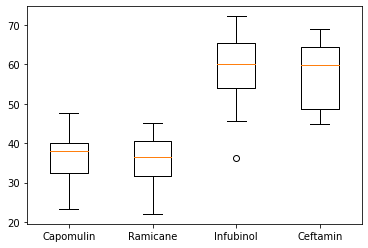

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimens_box_dict = {'Capomulin': capomulin_vols,
                    'Ramicane': ramicane_vols,
                    'Infubinol': infubinol_vols,
                    'Ceftamin': ceftamin_vols}
fig, ax = plt.subplots()
ax.boxplot(regimens_box_dict.values())
ax.set_xticklabels(regimens_box_dict.keys())

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

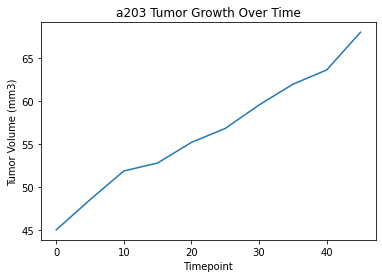

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# max_mouse = clean_mouse_study.groupby('Mouse ID').count()
#a203
a203 = clean_mouse_study.loc[clean_mouse_study.loc[:,'Mouse ID']=='a203',['Timepoint','Tumor Volume (mm3)']]
plt.plot(a203['Timepoint'],a203['Tumor Volume (mm3)'])
plt.title('a203 Tumor Growth Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

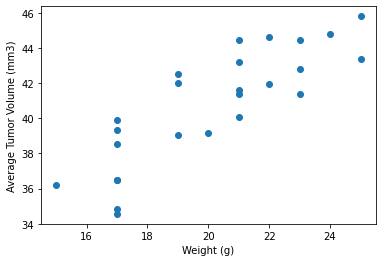

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = clean_mouse_study.loc[clean_mouse_study.loc[:,'Drug Regimen']=='Capomulin',['Mouse ID','Tumor Volume (mm3)','Weight (g)']].groupby('Mouse ID')
scatter_df_mean = scatter_df.mean()
plt.scatter(scatter_df_mean['Weight (g)'], scatter_df_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Text(0.5, 1.0, 'Correlation Coefficient of Weight to Tumor Volume is 0.8419363424694717')

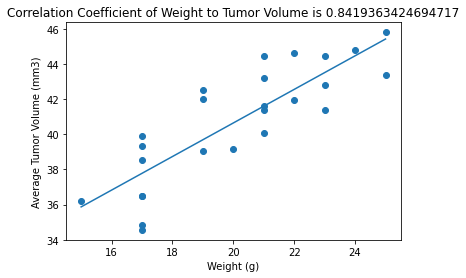

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
corr_coef = sts.pearsonr(scatter_df_mean['Weight (g)'], scatter_df_mean['Tumor Volume (mm3)'])
slope, intercept, r, p, ste = linregress(scatter_df_mean['Weight (g)'], scatter_df_mean['Tumor Volume (mm3)'])
x=np.arange(15,26,1)
y_pred=(x*slope)+intercept
plt.scatter(scatter_df_mean['Weight (g)'], scatter_df_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x,y_pred)
plt.title('Correlation Coefficient of Weight to Tumor Volume is 0.8419363424694717')
